# Importing Libraries and the dataset

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [256]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3687,3688,15626806,Labrador,668,France,Female,32,2,0.00,2,1,1,40652.33,0
666,667,15725511,Wallace,559,France,Female,31,3,127070.73,1,0,1,160941.78,0
6074,6075,15802570,Dyer,811,France,Female,45,5,0.00,2,1,1,146123.19,0
2464,2465,15725818,Chibuzo,583,Germany,Male,40,4,107041.30,1,1,1,5635.63,0
5779,5780,15723950,Kruglov,684,Spain,Male,40,2,70291.02,1,1,1,115468.84,1


In [257]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [258]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9666,758,Spain,Male,35,5,0.00,2,1,0,95009.60,0
8232,582,Spain,Male,25,9,148042.97,2,1,0,52341.15,0
2851,603,France,Female,48,5,0.00,1,1,0,100478.60,1
874,645,France,Female,38,5,101430.30,2,0,1,4400.32,0
1585,538,France,Male,33,6,93791.38,1,1,1,199249.29,0


# Data exploration

In [259]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [260]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


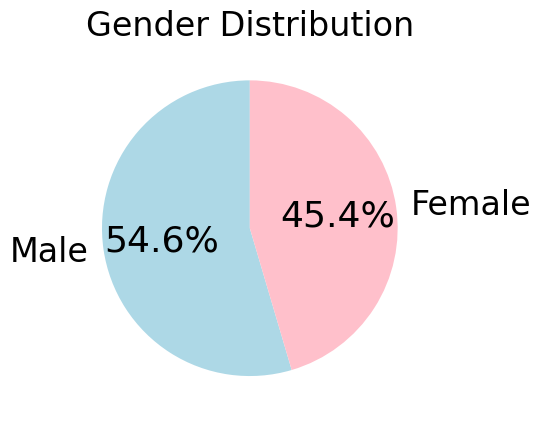

In [262]:
gender_distribution = df['Gender'].value_counts(normalize=True) * 100

plt.pie(gender_distribution,labels=gender_distribution.index,autopct='%1.1f%%',startangle=90,colors=['lightblue','pink'])
plt.title('Gender Distribution')
plt.show()

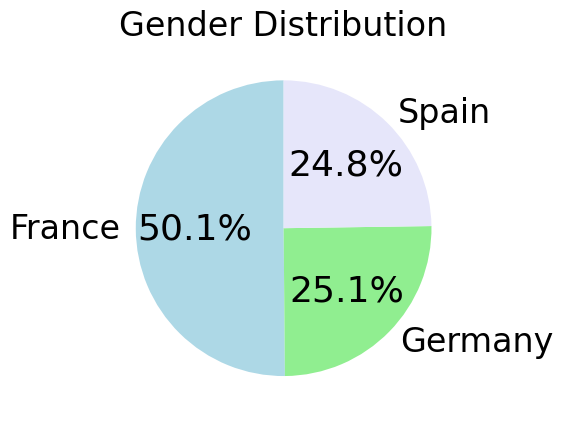

In [263]:
geography_distribution = df['Geography'].value_counts(normalize=True) * 100


plt.pie(geography_distribution,labels=geography_distribution.index,autopct='%1.1f%%',startangle=90,colors=['lightblue', 'lightgreen', 'lavender'])
plt.title('Gender Distribution')
plt.show()

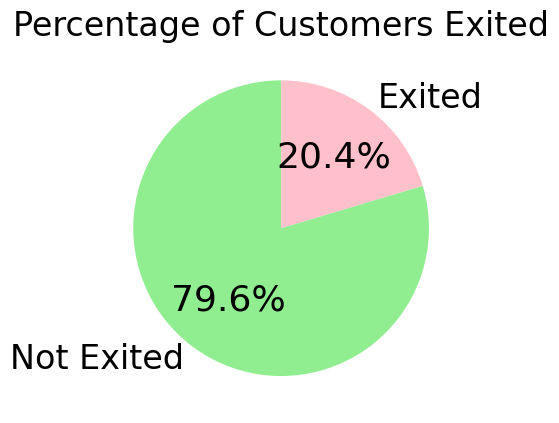

In [264]:
exited_counts =  df['Exited'].value_counts(normalize=True) * 100
plt.pie(exited_counts, labels=exited_counts.index.map({0: 'Not Exited', 1: 'Exited'}), autopct='%1.1f%%', startangle=90, colors=['lightgreen','pink'])
plt.title('Percentage of Customers Exited')
plt.show()

# Data Visualization

## Data and Functions to Visualize

In [265]:
tenure_exited_no = df[df.Exited== 0].Tenure
tenure_exited_yes = df[df.Exited== 1].Tenure

EstimatedSalary_exited_no = df[df.Exited== 0].EstimatedSalary
EstimatedSalary_exited_yes = df[df.Exited== 1].EstimatedSalary


balance_exited_no = df[df.Exited== 0].Balance
balance_exited_yes = df[df.Exited== 1].Balance

CreditScore_exited_no = df[df.Exited== 0].CreditScore
CreditScore_exited_yes = df[df.Exited== 1].CreditScore


In [266]:
def histo(feature_exited_no, feature_exited_yes, axis, bins=None, xlabel="Feature", ylabel="No. of customers", title="Feature Distribution"):
    axis.hist(feature_exited_no, bins=bins, color='green', alpha=0.5, edgecolor='black')
    axis.hist(feature_exited_yes, bins=bins, color='red', alpha=0.5, edgecolor='black')
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    axis.set_title(title)


In [267]:
def barh(list,axis,ylabel,title,map=False):
    product_counts = df.groupby(list).size().unstack(fill_value=0)
    if map:
        product_counts.index = product_counts.index.map({0: 'No', 1: 'Yes'})
        
    product_counts.plot(kind='barh', ax=axis, color=['green', 'red'], alpha=0.5, edgecolor='black',legend=False)
    axis.set_xlabel("No. of Customers")
    axis.set_ylabel(ylabel)
    axis.set_title(title)

In [268]:
def doughnutChart(feature,colors1,colors2,axis1,axis2,title):
    exited_counts = df[df.Exited == 1][feature].value_counts(normalize=True) * 100
    not_exited_counts = df[df.Exited == 0][feature].value_counts(normalize=True) * 100
    sizes_exited = exited_counts.values
    labels_exited = exited_counts.index
    colors_exited = colors1  # Adjust colors as needed

    wedges, texts, autotexts = axis1.pie(sizes_exited, labels=labels_exited, autopct='%1.1f%%', startangle=140, colors=colors_exited,
                                        wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.85)

    # Draw center circle for doughnut
    centre_circle = plt.Circle((0,0),0.70,fc='white', transform=axis1.transData._b)
    axis1.add_artist(centre_circle)
    axis1.set_title(title)

    # Plot for not exited customers
    sizes_not_exited = not_exited_counts.values
    labels_not_exited = not_exited_counts.index
    colors_not_exited = colors2  # Adjust colors as needed

    wedges, texts, autotexts = axis2.pie(sizes_not_exited, labels=labels_not_exited, autopct='%1.1f%%', startangle=140, colors=colors_not_exited,
                                        wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.85)

    # Draw center circle for doughnut
    centre_circle = plt.Circle((0,0),0.70,fc='white', transform=axis2.transData._b)
    axis2.add_artist(centre_circle)
    axis2.set_title(f'Not {title}')


## Visualizations

C:\Users\dell\AppData\Local\Temp\ipykernel_12212\1489787077.py:29: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [mpatches.Patch(color='green', label='Exited=No', alpha=0.5, edgecolor='black'),
C:\Users\dell\AppData\Local\Temp\ipykernel_12212\1489787077.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  mpatches.Patch(color='red', label='Exited=Yes', alpha=0.5, edgecolor='black')]


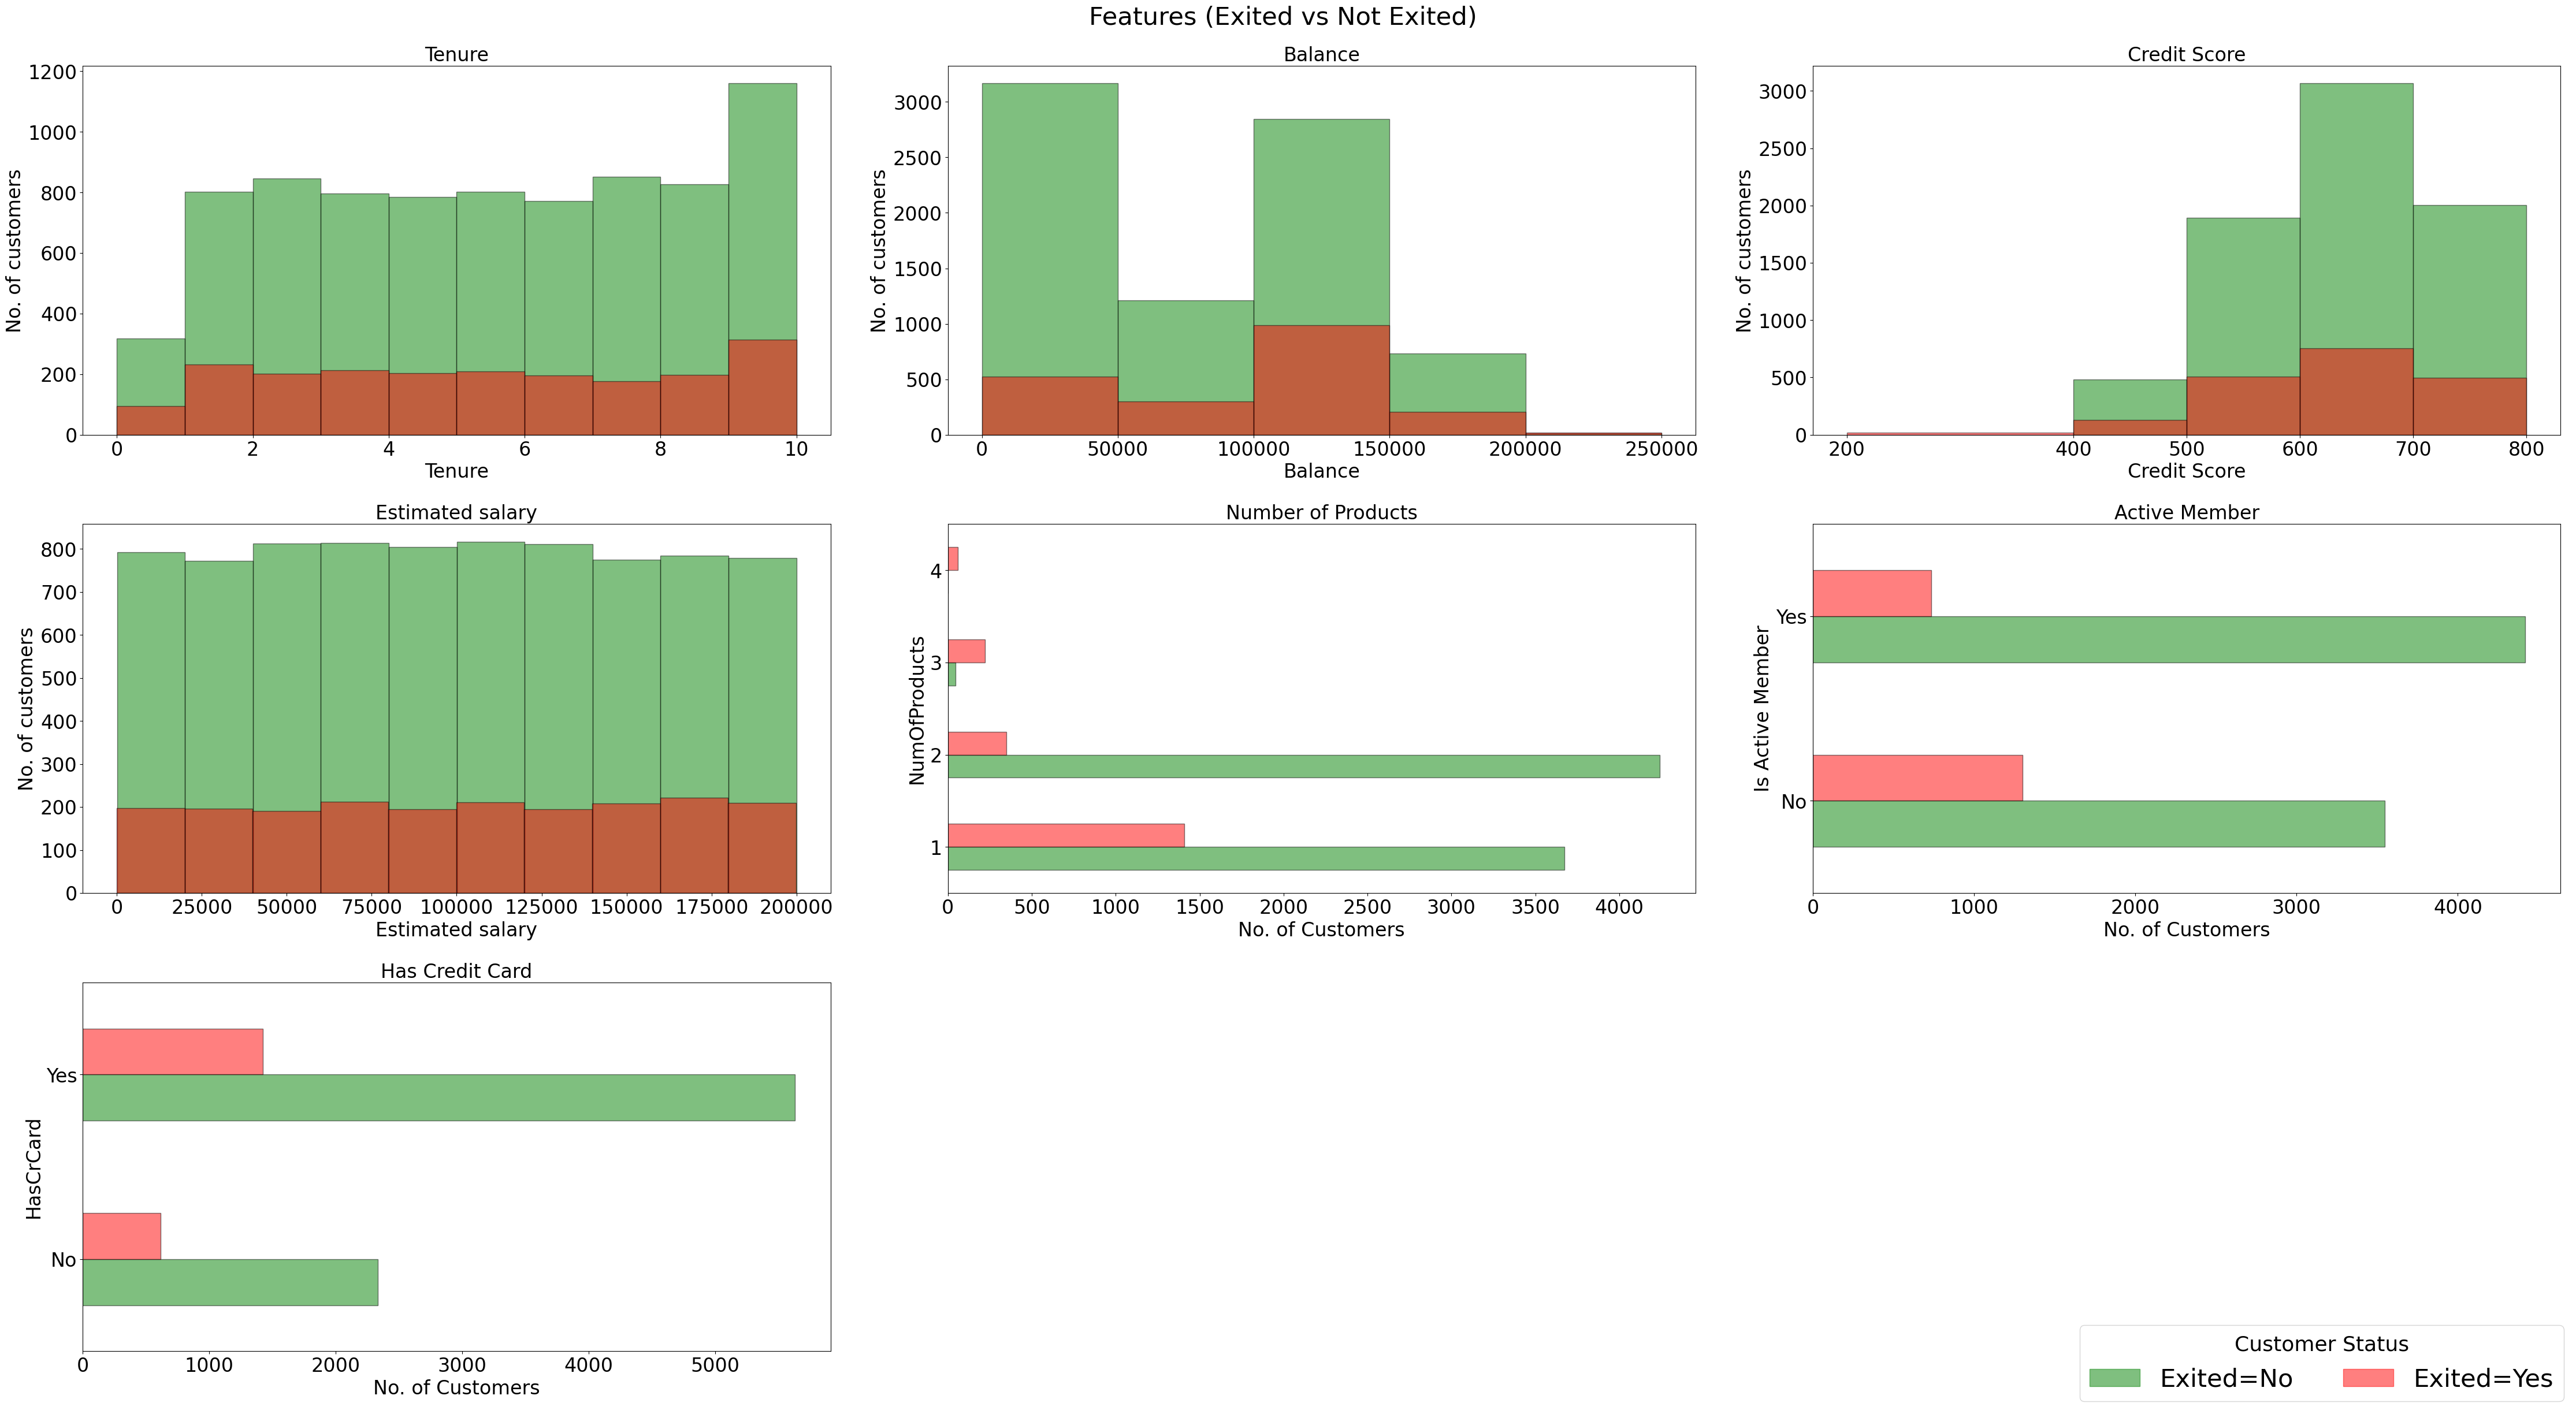

In [269]:
# Setup the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(45, 25))
plt.subplots_adjust(hspace=0.9,wspace=0.9)

plt.rcParams['font.size'] = 26  # Sets the default font size

histo(tenure_exited_no,tenure_exited_yes,axes[0,0],xlabel='Tenure',title='Tenure')

# Balance
histo(balance_exited_no,balance_exited_yes,axes[0,1],bins=[0, 50000, 100000, 150000, 200000, 250000],xlabel='Balance',title='Balance')

# CreditScore
histo(CreditScore_exited_no,CreditScore_exited_yes,axes[0,2],bins=[200,400, 500, 600, 700, 800],xlabel='Credit Score',title='Credit Score')
axes[0, 2].set_xticks([200,400, 500, 600, 700, 800])

# EstimatedSalary
histo(EstimatedSalary_exited_no,EstimatedSalary_exited_yes,axes[1,0],xlabel='Estimated salary',title='Estimated salary')

# NumOfProducts
barh(['NumOfProducts', 'Exited'],axes[1,1],'NumOfProducts','Number of Products')


# IsActiveMember
barh(['IsActiveMember', 'Exited'],axes[1,2],'Is Active Member','Active Member',True)

# Has Credit card
barh(['HasCrCard', 'Exited'],axes[2,0],'HasCrCard','Has Credit Card',True)
# Create custom patches as legend handles
handles = [mpatches.Patch(color='green', label='Exited=No', alpha=0.5, edgecolor='black'),
           mpatches.Patch(color='red', label='Exited=Yes', alpha=0.5, edgecolor='black')]

# Place a single legend on the figure
fig.legend(handles=handles, loc='lower right', ncol=2, fontsize='large', title='Customer Status')

axes[2,1].axis('off')
axes[2,2].axis('off')


fig.suptitle('Features (Exited vs Not Exited)')
plt.tight_layout()
plt.show()


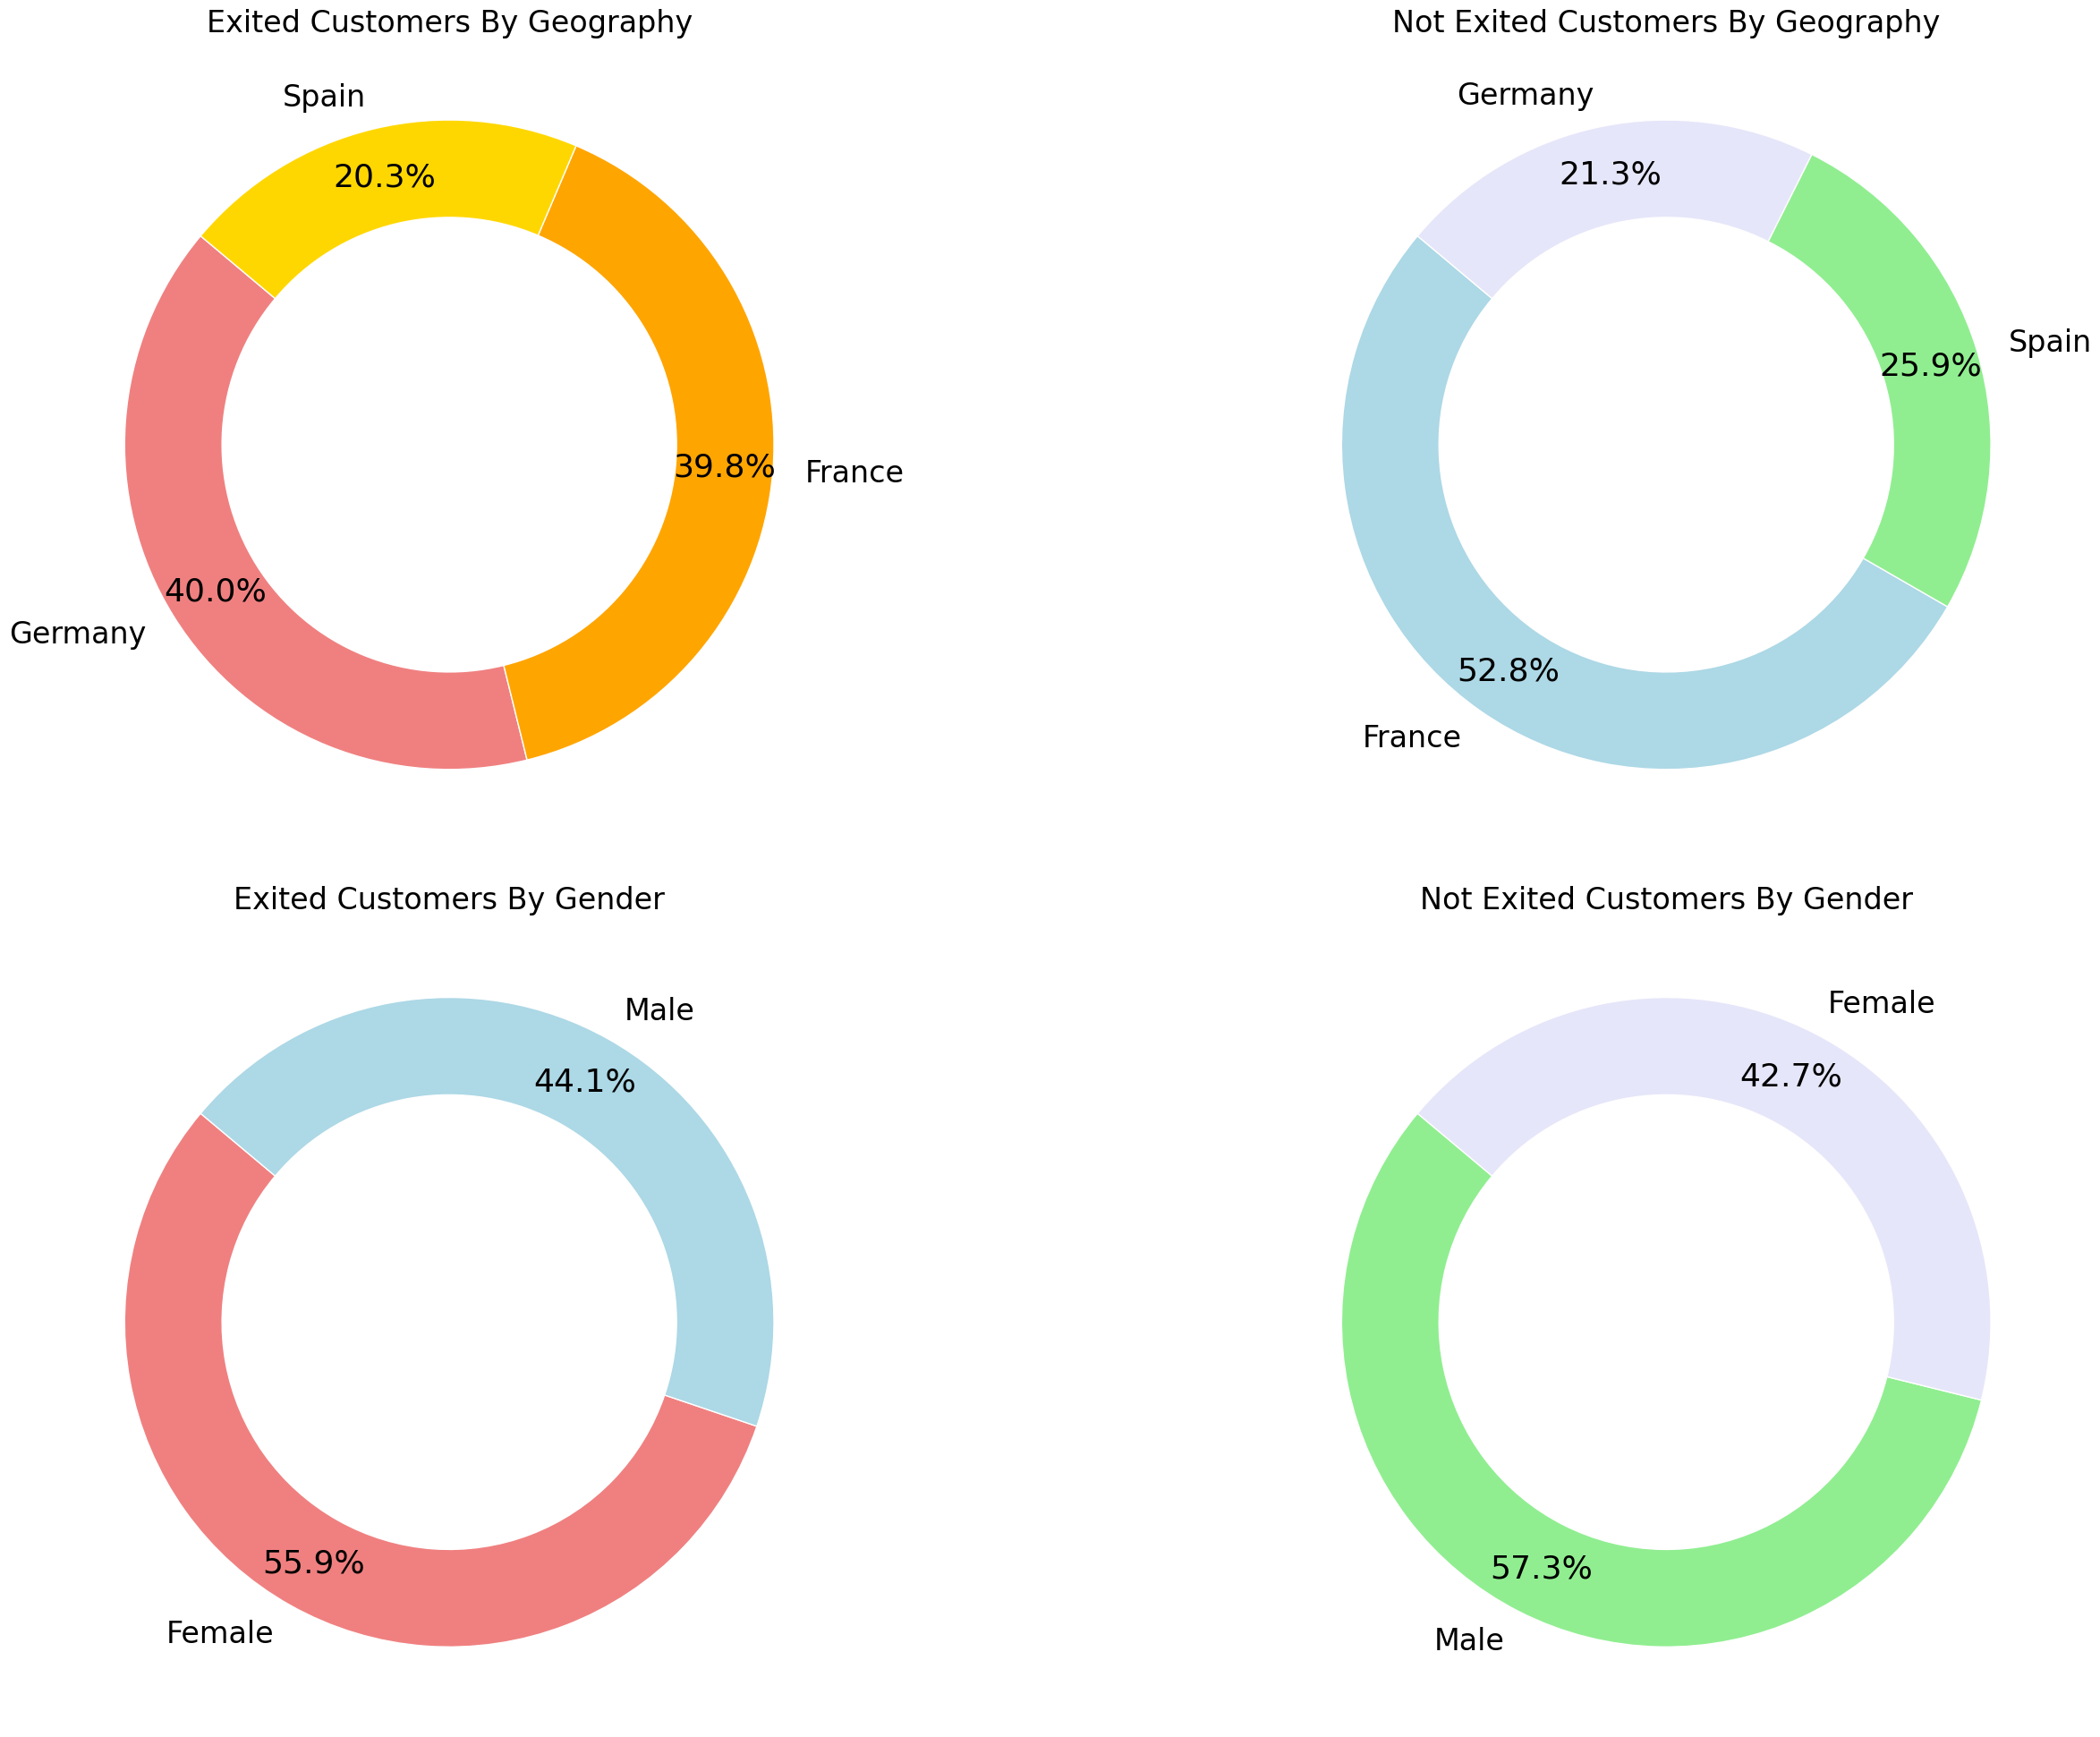

In [270]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))
plt.subplots_adjust(hspace=0.5,wspace=0.5)

doughnutChart('Geography',['lightcoral', 'orange', 'gold'],['lightblue', 'lightgreen', 'lavender'],axs[0,0],axs[0,1],'Exited Customers By Geography')


doughnutChart('Gender',['lightcoral', 'lightblue'],['lightgreen', 'lavender'],axs[1,0],axs[1,1],'Exited Customers By Gender')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Encoding and scaling the data

In [271]:
for col in df:
    print(f'{col} : {df[col].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [272]:
df['Gender'] = df['Gender'].map({'Female': 0,'Male':1})
df['Geography'] = df['Geography'].map({'France': 0,'Spain':1,'Germany':3})

In [273]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [274]:
df['Tenure'] = scaler.fit_transform(df[["Tenure"]])

Use Robust scaler to avoid the outliers in the data

In [275]:
from sklearn.preprocessing import RobustScaler
scaler2 = RobustScaler()

In [276]:
cols_to_scale = ["CreditScore","Age","Balance","EstimatedSalary"]

In [277]:
df[cols_to_scale] = scaler2.fit_transform(df[cols_to_scale])

In [278]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4089,0.074627,0,0,0.833333,0.6,-0.761480,2,1,1,0.296778,0
2808,0.014925,0,1,0.416667,0.7,0.016174,1,1,1,-0.331205,0
4683,-0.477612,0,1,0.083333,0.1,0.212095,1,1,0,-0.246221,0
1659,0.208955,1,0,-0.500000,0.9,0.177268,2,1,1,0.009609,0
1315,-0.335821,1,0,-0.833333,0.5,0.029094,1,0,0,-0.940810,0


In [279]:
df.shape

(10000, 11)

# Spliting the data and Using SMOTE to solve the imbalance problem in the data (Exit values are 80 to 20)

In [280]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split

In [281]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [282]:
y_sm.shape

(15926,)

In [283]:

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=42,stratify=y_sm)

# Model building and Evaluating it's accuracy,classification report on the test data 

In [284]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(16,input_shape=(10,), activation='gelu'),
    keras.layers.Dense(32,activation='gelu'),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    mode='max',  # We aim to maximize accuracy, so 'max'
    patience=35,  # Number of epochs with no improvement after which training will be stopped
    min_delta=0.035,  # Minimum change to qualify as an improvement
    verbose=1  # To print messages when the callback takes action
)

# Fit the model, including the validation split and the EarlyStopping callback
model.fit(
    X_train, 
    y_train, 
    epochs=80,
    validation_split=0.15,  # Use 15% of the data for validation
    callbacks=[early_stopping]  # Include the EarlyStopping callback
)

Epoch 1/80


339/339 [==============================] - 2s 3ms/step - loss: 0.5567 - accuracy: 0.7111 - val_loss: 0.4856 - val_accuracy: 0.7781
Epoch 2/80
339/339 [==============================] - 1s 2ms/step - loss: 0.4701 - accuracy: 0.7725 - val_loss: 0.4415 - val_accuracy: 0.7886
Epoch 3/80
339/339 [==============================] - 1s 3ms/step - loss: 0.4486 - accuracy: 0.7875 - val_loss: 0.4314 - val_accuracy: 0.7996
Epoch 4/80
339/339 [==============================] - 1s 3ms/step - loss: 0.4430 - accuracy: 0.7907 - val_loss: 0.4250 - val_accuracy: 0.8053
Epoch 5/80
339/339 [==============================] - 1s 2ms/step - loss: 0.4393 - accuracy: 0.7909 - val_loss: 0.4245 - val_accuracy: 0.8100
Epoch 6/80
339/339 [==============================] - 1s 3ms/step - loss: 0.4392 - accuracy: 0.7934 - val_loss: 0.4198 - val_accuracy: 0.8069
Epoch 7/80
339/339 [==============================] - 1s 3ms/step - loss: 0.4346 - accuracy: 0.7920 - val_loss: 0.4264 - val_accuracy: 0.7975
Epoch 8/80
339/33

In [289]:
model.evaluate(X_test, y_test)

100/100 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.8032


[0.424142986536026, 0.8032014966011047]

In [290]:
yp = model.predict(X_test)

  1/100 [..............................] - ETA: 2s

100/100 [==============================] - 0s 3ms/step


In [291]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [292]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1593
           1       0.81      0.79      0.80      1593

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186

